In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load dataset
df = pd.read_csv("heart.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# Separate features and target
X = df.drop(columns=['target'])  # Change 'target' if your label column is named differently
y = df['target']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Predictions & accuracy
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



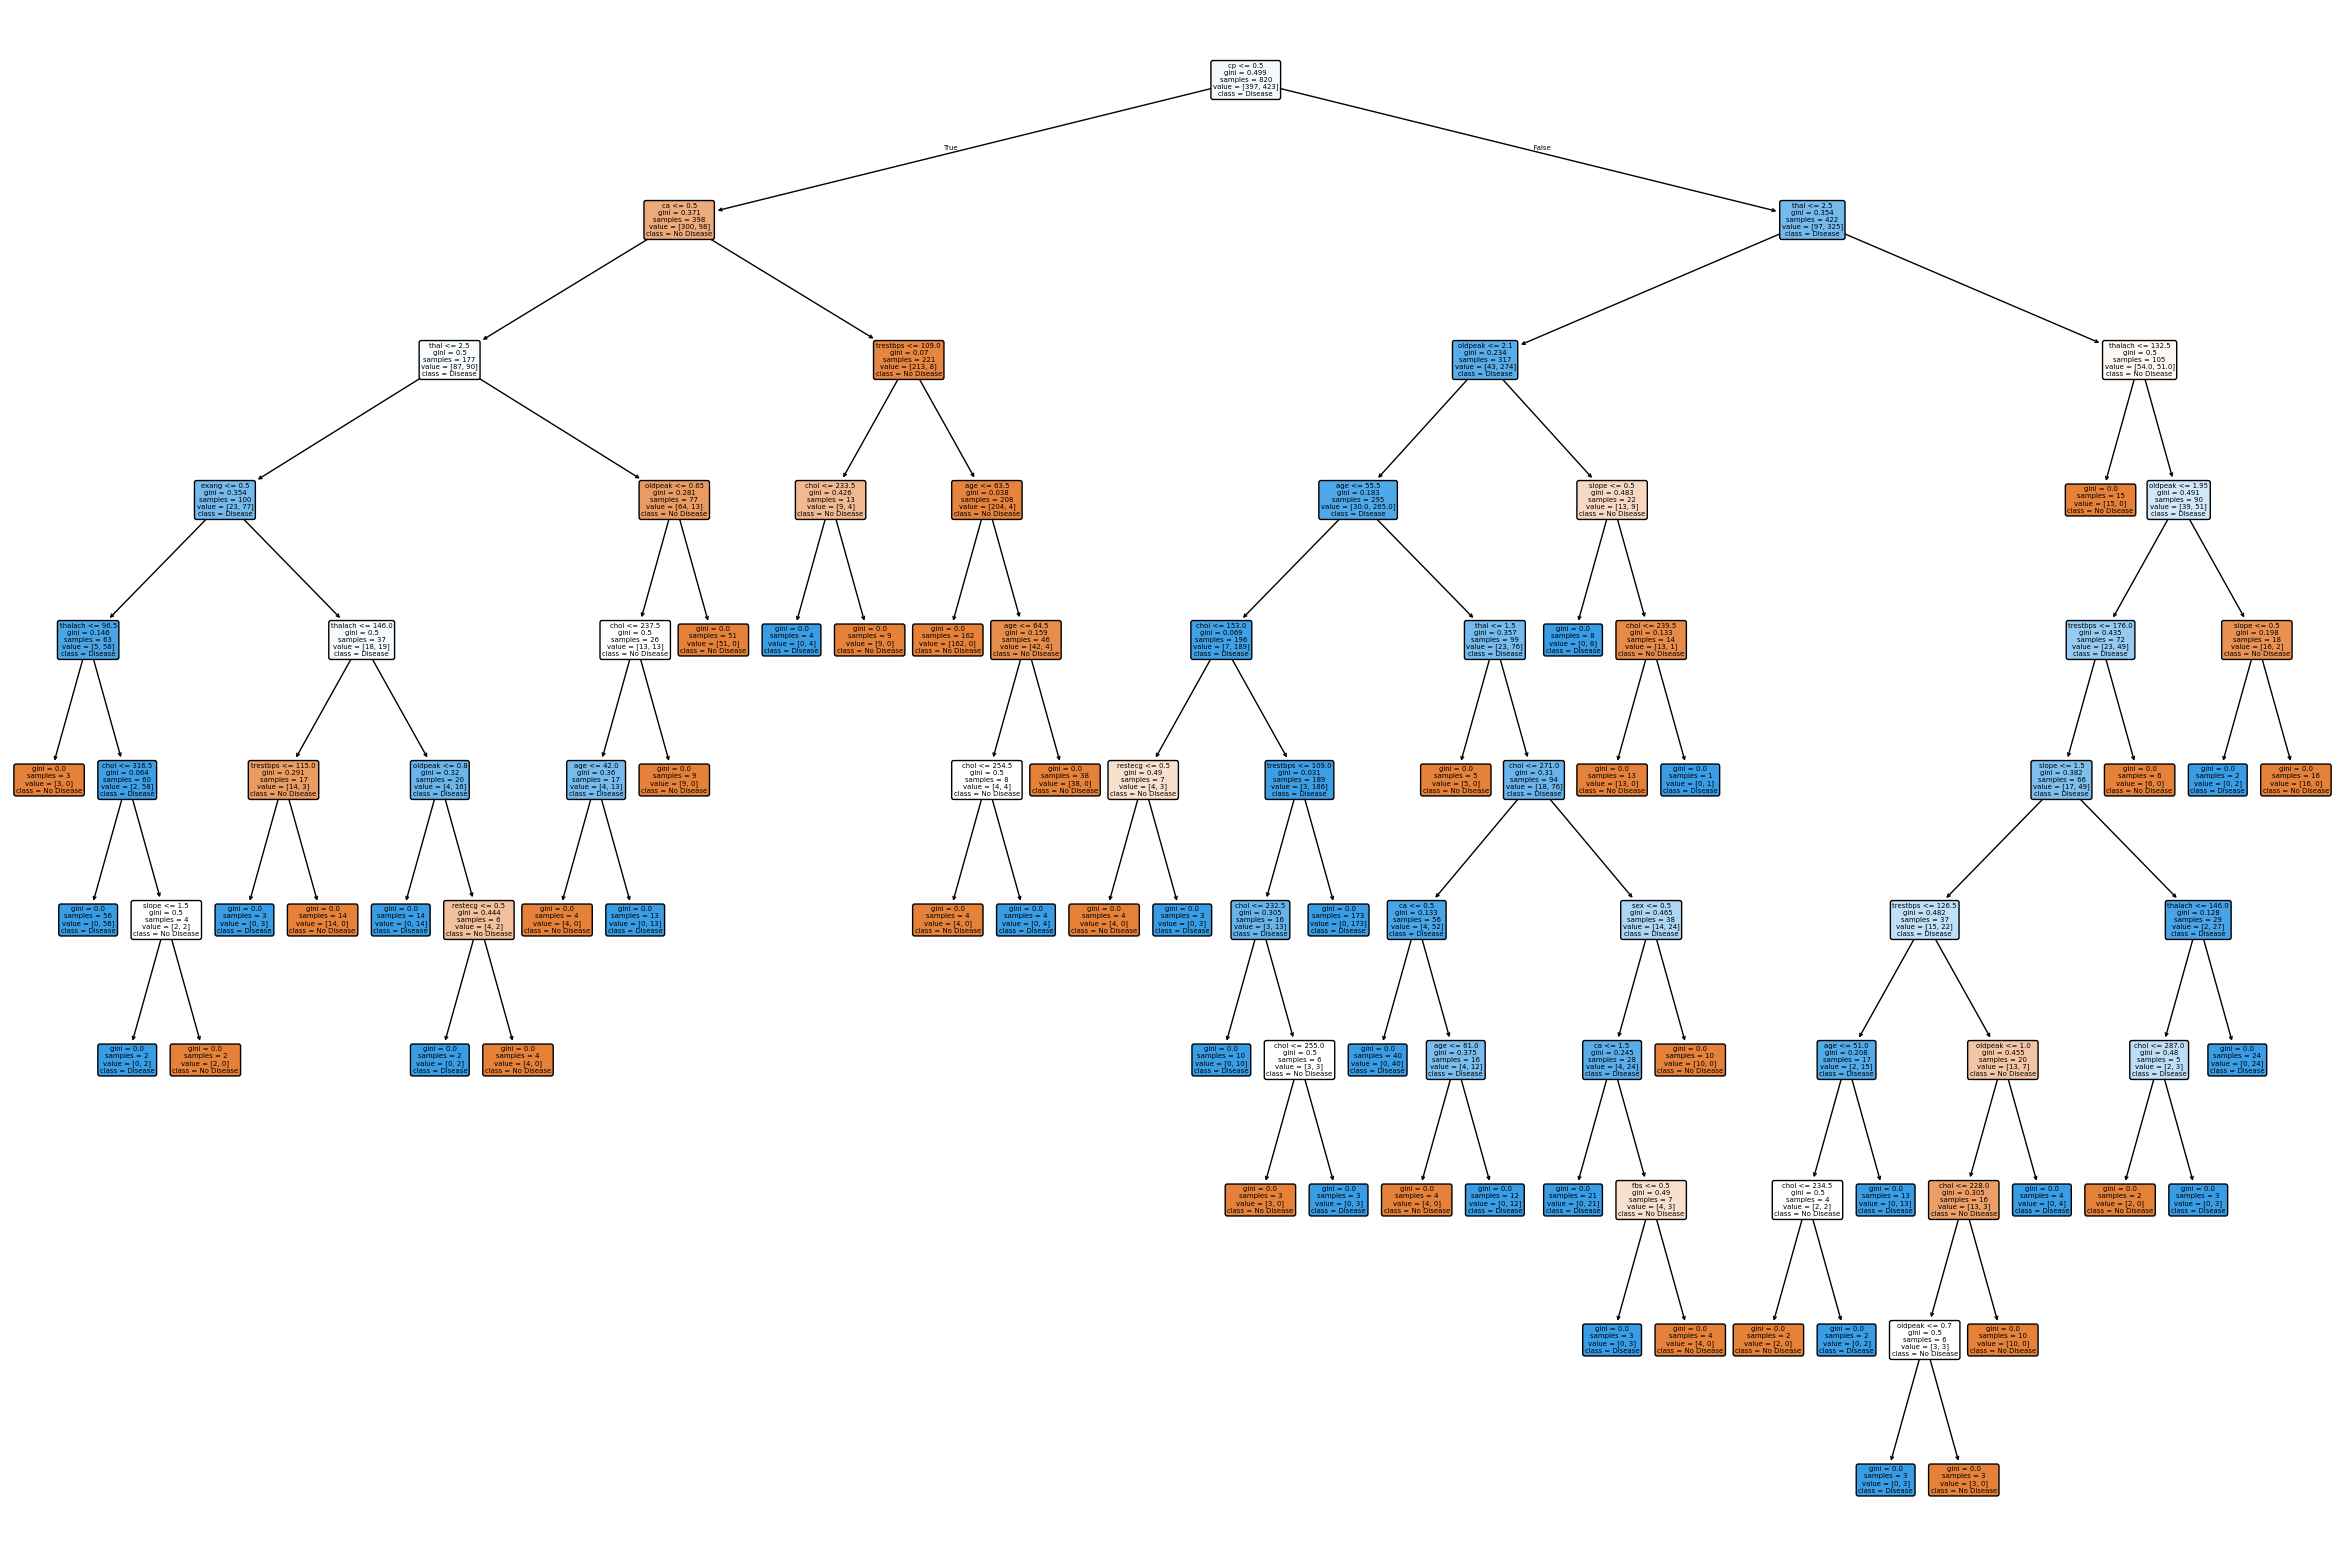

In [19]:
# Visualize Decision Tree
plt.figure(figsize=(30,20))  
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],  
    filled=True,
    fontsize=5,  
    rounded=True  
)
plt.show()

In [10]:
# Control overfitting by limiting depth
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)
y_pred_dt_limited = dt_limited.predict(X_test)
print("\nDecision Tree (max_depth=3) Accuracy:", accuracy_score(y_test, y_pred_dt_limited))


Decision Tree (max_depth=3) Accuracy: 0.7804878048780488


In [11]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


In [12]:
# Feature Importances
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", feat_imp)


Feature Importances:
 cp          0.134791
ca          0.127149
thalach     0.122002
oldpeak     0.121119
thal        0.110847
age         0.077912
chol        0.075145
trestbps    0.071376
exang       0.057739
slope       0.046353
sex         0.028902
restecg     0.018385
fbs         0.008280
dtype: float64


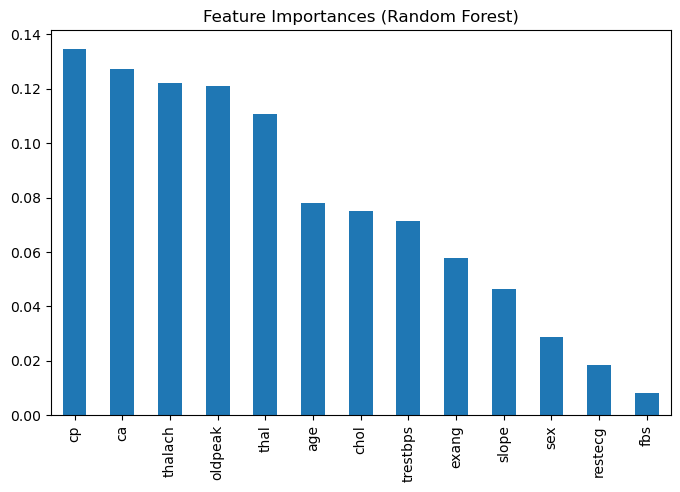

In [13]:
# Plot feature importances
plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.show()

In [14]:
# Cross-validation scores
dt_cv = cross_val_score(dt, X, y, cv=5)
rf_cv = cross_val_score(rf, X, y, cv=5)
print("\nDecision Tree CV Accuracy:", np.mean(dt_cv))
print("Random Forest CV Accuracy:", np.mean(rf_cv))


Decision Tree CV Accuracy: 1.0
Random Forest CV Accuracy: 0.9970731707317073
